Part 1 : load the Diabetes data set

In [80]:
import pandas as pd

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

y = diabetes.target

Part 2: Import other necessary libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Part 3: Creat a function that take x and Y, fit them into a linear regression model, and return the ouput of the model fit


In [61]:
def train(x,y):
  #make x(a column from data set X and array)
  x = np.array(x)
  #reshape it to(x, x)
  x = x.reshape((len(x),1))
  #spilt train and test
  Xtrain, Xtest, ytrain, ytest = train_test_split(x,y,random_state=1)

  #fit a model
  model = LinearRegression(fit_intercept=True)
  model.fit(Xtrain,ytrain)

  #print out coefficient for train and test
  print('Training R^2 for',model.score(Xtrain,ytrain))
  print('Testing R^2',model.score(Xtest,ytest))
                   

Part 4： Show the function!!!


In [59]:
columns = X.columns # get all the column name

#test the first column age
train(X['age'],y)

Training R^2 for 0.028850662360636603
Testing R^2 0.03424489584219226


Part 5: Using the function, find the best single feature (i.e., column) in X that best predicts y

In [62]:
# loop through all the column name in X datafram and run train function
for i in columns:
  print(i)
  train(X[i], y)

#BMi has the heiest coefficient 38.888 for train

age
Training R^2 for 0.045384727639879774
Testing R^2 -0.011092244658333694
sex
Training R^2 for 0.0017198871797380333
Testing R^2 -0.004657205501040096
bmi
Training R^2 for 0.38880250430560737
Testing R^2 0.17466209865339177
bp
Training R^2 for 0.1964839686305333
Testing R^2 0.18390082705313726
s1
Training R^2 for 0.04168667199614595
Testing R^2 0.05003179316202577
s2
Training R^2 for 0.02470761499669738
Testing R^2 0.04248875852908429
s3
Training R^2 for 0.17017321772012173
Testing R^2 0.09411124480311595
s4
Training R^2 for 0.19338632561329683
Testing R^2 0.15094928794177753
s5
Training R^2 for 0.32597994540659747
Testing R^2 0.29630801377437443
s6
Training R^2 for 0.15228926762626183
Testing R^2 0.12046966383556679


Part 6: create a subplot

Text(0.1, 25, 'Testing R^2 for')

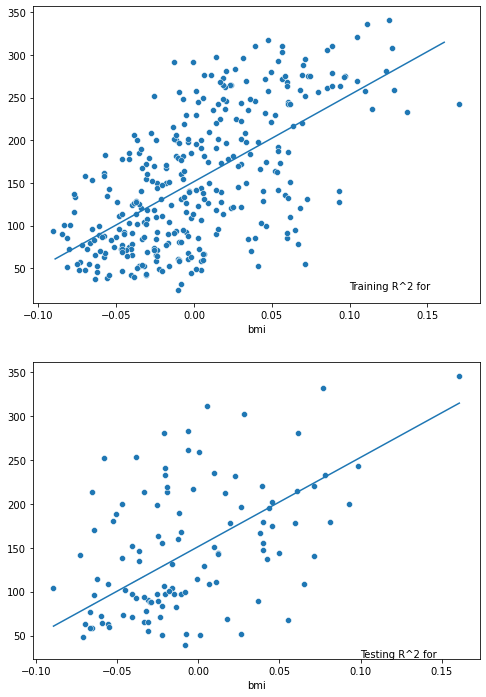

In [94]:
#get X train, X test, ytrain, y test for bi
Xtrain, Xtest, ytrain, ytest = train_test_split(X[['bmi']],y,random_state=1)
fig,axes = plt.subplots(2,1,figsize=[8,12])

#fit a model
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain,ytrain)

#predict y value
y_model = model.predict(Xtest)

#subplot train and best fit line
sns.scatterplot(x = Xtrain[Xtrain.columns[0]],y = ytrain,ax=axes[0])
sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes[0])
axes[0].text(0.1,25,'Training R^2 for'.format(model.score(Xtrain,ytrain)))


#subplot test and best fit line
sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes[1])
sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes[1])
axes[1].text(0.1,25,'Testing R^2 for'.format(model.score(Xtest,ytest)))
